In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as solver
from functools import reduce

In [17]:
df = pd.read_csv(r'C:/Users/88695/Desktop/中正碩一/中正碩二/基金管理/投資組合資料/weights.csv',index_col=0, parse_dates=True)
 
total_stocks = len(df.columns)
# print(total_stocks) 
 
returns = df.pct_change()
# print(returns)
returns = returns[1:]
returns.head()


,weight,price_original,price_alter,Amount,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
Company,,,,,,,,,,,
7443.T,0.07067,565.00,4.63,70670000,15253615,Expected annual return,95.20%,NaN,NaN,JPY/USD,0.0082
779.F,0.03206,13.60,15.00,32060000,2137219,Annual volatility,8.00%,NaN,NaN,CAD/USD,0.7947
9S2.F,0.14215,6.94,7.65,142150000,18569999,Sharpe Ratio,11.63,NaN,NaN,EUR/USD,1.1030
AKT-B.TO,0.00503,2.51,1.99,5030000,2521686,NaN,NaN,NaN,NaN,AUD/USD,0.7462
BDGI.TO,0.02348,29.18,23.19,23480000,1012534,NaN,NaN,NaN,NaN,NaN,NaN
BIH.F,0.03861,3.14,3.46,38610000,11147940,NaN,NaN,NaN,NaN,NaN,NaN
CET.TO,0.00664,0.76,0.60,6640000,10993887,NaN,NaN,NaN,NaN,NaN,NaN
COE.AX,0.01228,0.28,0.21,12280000,58773978,NaN,NaN,NaN,NaN,NaN,NaN
EPM,0.02130,7.04,7.04,21300000,3025568,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
covariance_matrix = returns.cov() * 252
stocks_expected_return =returns.mean() * 252
stocks_weights = np.array([(1/total_stocks),]*total_stocks )
print(stocks_weights)
portfolio_return = sum(stocks_weights * stocks_expected_return)
portfolio_risk = np.sqrt(reduce(np.dot, [stockweight, covariance_matrix, stocks_weights.T]))#把前兩個矩陣先相乘再將結果乘上第三個矩陣
print('預期報酬率為: '+ str(round(portfolio_return,4)))
print('風險為: ' + str(round(portfolio_risk
                          ,4)))

ValueError: shapes (26,) and (20,20) not aligned: 26 (dim 0) != 20 (dim 0)

In [24]:
weight = np.random.rand(total_stocks)
print(sum(weight))

9.180925061909422


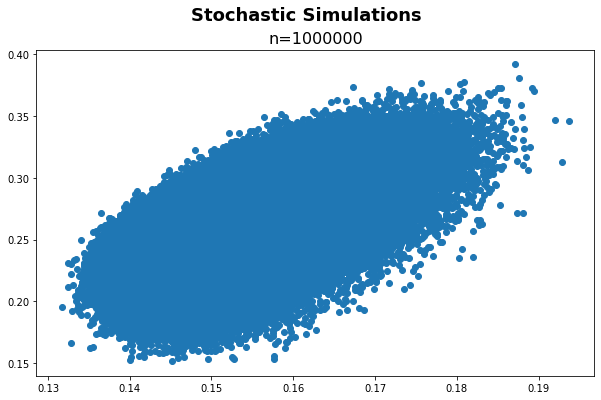

In [25]:
risk_list = []
return_list = []
simulations_target = 10**6
 
for _ in range(simulations_target):
 
    # random weighted
    weight = np.random.rand(total_stocks)
    weight = weight / sum(weight)
 
    # calculate result
    ret = sum(stocks_expected_return * weight)
    risk = np.sqrt(reduce(np.dot, [weight, covariance_matrix, weight.T]))
 
    # record
    return_list.append(ret)
    risk_list.append(risk)
 
fig = plt.figure(figsize = (10,6))
fig.suptitle('Stochastic Simulations', fontsize=18, fontweight='bold')
 
ax = fig.add_subplot()
ax.plot(risk_list, return_list, 'o')
ax.set_title(f'n={simulations_target}', fontsize=16)
 
fig.savefig('Stochastic_Simulations.png', dpi=300)

In [26]:
def standard_deviation(weights):
    return np.sqrt(reduce(np.dot, [weights, covariance_matrix, weights.T]))


In [27]:
x0 = stocks_weights
bounds = tuple((0, 1) for x in range(total_stocks))
constraints = [{'type': 'eq', 'fun': lambda x: sum(x)-1}]
minimize_variance = solver.minimize(standard_deviation, x0=x0, constraints=constraints, bounds=bounds)
 
mvp_risk = minimize_variance.fun
mvp_return = sum(minimize_variance.x * stocks_expected_return)
# print(minimize_variance.x) 
print('風險最小化投資組合預期報酬率為:' + str(round(mvp_return,2)))
print('風險最小化投資組合風險為:' + str(round(mvp_risk,2)))

風險最小化投資組合預期報酬率為:0.18
風險最小化投資組合風險為:0.13


In [28]:
t=[]
for i in range(total_stocks):
    stock_symbol = str(df.columns[i])
    weighted = str(format(minimize_variance.x[i],'4f'))
#     print(minimize_variance.x[i])
    t.append(minimize_variance.x[i])
    print(f'{stock_symbol} 佔投資組合權重 : {weighted}')

A 佔投資組合權重 : 0.057998
AAP 佔投資組合權重 : 0.063799
ABBV 佔投資組合權重 : 0.123703
ABMD 佔投資組合權重 : 0.004420
ABT 佔投資組合權重 : 0.115291
ACN 佔投資組合權重 : 0.000000
ADBE 佔投資組合權重 : 0.000000
ADM 佔投資組合權重 : 0.098692
ADP 佔投資組合權重 : 0.023402
AES 佔投資組合權重 : 0.027575
AFL 佔投資組合權重 : 0.000000
AIG 佔投資組合權重 : 0.000000
AKAM 佔投資組合權重 : 0.051463
ALB 佔投資組合權重 : 0.000000
ALK 佔投資組合權重 : 0.000000
AOS 佔投資組合權重 : 0.000000
APD 佔投資組合權重 : 0.040088
ARE 佔投資組合權重 : 0.139800
ATVI 佔投資組合權重 : 0.051349
MMM 佔投資組合權重 : 0.202418


In [29]:
x0 = stocks_weights
# print(len(x0))
bounds = tuple((0, 1) for x in range(total_stocks))
# print(len(bounds))
efficient_fronter_return_range = np.arange(0.05, 0.5, .05)
efficient_fronter_risk_list = []
e=[] 
v=[]
for i in efficient_fronter_return_range:
    constraints = [{'type': 'eq', 'fun': lambda x: sum(x) - 1},
                   {'type': 'eq', 'fun': lambda x: sum(x * stocks_expected_return) - i}]#eq 表後面的方程式要等於0
#     print(constraints)
    efficient_fronter = solver.minimize(standard_deviation, x0=x0, constraints=constraints, bounds=bounds)
    print(efficient_fronter)
    print(efficient_fronter.x)
    e.append(efficient_fronter.x)
    v.append(efficient_fronter.fun)
#     print(efficient_fronter)
    efficient_fronter_risk_list.append(efficient_fronter.fun)
    #print(efficient_fronter.fun)

     fun: 0.14584171924081038
     jac: array([0.10447487, 0.08265449, 0.07276914, 0.15175463, 0.09079115,
       0.1288888 , 0.12987682, 0.08545719, 0.11210747, 0.09180444,
       0.10397774, 0.11256216, 0.16057286, 0.18900378, 0.11083206,
       0.12938887, 0.15965598, 0.0901236 , 0.15613533, 0.13976689])
 message: 'Optimization terminated successfully'
    nfev: 210
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([4.73233073e-17, 2.08825781e-18, 0.00000000e+00, 6.32618977e-02,
       2.51750077e-02, 0.00000000e+00, 2.57215516e-02, 0.00000000e+00,
       4.07950609e-17, 0.00000000e+00, 0.00000000e+00, 8.54473114e-18,
       1.47019450e-01, 1.39659006e-17, 2.76271502e-17, 5.61106932e-17,
       2.27018526e-01, 5.13610692e-02, 1.08713833e-01, 3.51728664e-01])
[4.73233073e-17 2.08825781e-18 0.00000000e+00 6.32618977e-02
 2.51750077e-02 0.00000000e+00 2.57215516e-02 0.00000000e+00
 4.07950609e-17 0.00000000e+00 0.00000000e+00 8.54473114e-18
 1.47019450e-01 1.39659006

In [30]:
stock_symbol = df.columns

In [31]:
e

[array([4.73233073e-17, 2.08825781e-18, 0.00000000e+00, 6.32618977e-02,
        2.51750077e-02, 0.00000000e+00, 2.57215516e-02, 0.00000000e+00,
        4.07950609e-17, 0.00000000e+00, 0.00000000e+00, 8.54473114e-18,
        1.47019450e-01, 1.39659006e-17, 2.76271502e-17, 5.61106932e-17,
        2.27018526e-01, 5.13610692e-02, 1.08713833e-01, 3.51728664e-01]),
 array([0.00000000e+00, 2.33410196e-02, 4.75567792e-02, 2.02839446e-02,
        1.26899126e-01, 8.44015753e-18, 1.33501627e-02, 0.00000000e+00,
        8.30378523e-18, 3.45786539e-02, 9.32502872e-18, 0.00000000e+00,
        8.13916919e-02, 3.56135433e-17, 6.70776547e-18, 0.00000000e+00,
        1.35709057e-01, 1.55566143e-01, 7.25484610e-02, 2.88774960e-01]),
 array([3.31705133e-02, 5.57050721e-02, 9.99077624e-02, 1.16619618e-02,
        1.24388976e-01, 0.00000000e+00, 5.38132168e-04, 5.37465615e-02,
        0.00000000e+00, 3.27800389e-02, 4.33680869e-19, 0.00000000e+00,
        6.34898222e-02, 5.09575021e-18, 0.00000000e+00, 0.00

In [32]:
for i in range(len(e)):
    print(f'標準差:{format(v[i],"4f")}')
    for j in range(len(stock_symbol)):
        weighted = str(format(e[i][j],'4f'))
        print(f'{stock_symbol[j]} 權重: {weighted}')
    print('\n')    

標準差:0.145842
A 權重: 0.000000
AAP 權重: 0.000000
ABBV 權重: 0.000000
ABMD 權重: 0.063262
ABT 權重: 0.025175
ACN 權重: 0.000000
ADBE 權重: 0.025722
ADM 權重: 0.000000
ADP 權重: 0.000000
AES 權重: 0.000000
AFL 權重: 0.000000
AIG 權重: 0.000000
AKAM 權重: 0.147019
ALB 權重: 0.000000
ALK 權重: 0.000000
AOS 權重: 0.000000
APD 權重: 0.227019
ARE 權重: 0.051361
ATVI 權重: 0.108714
MMM 權重: 0.351729


標準差:0.131500
A 權重: 0.000000
AAP 權重: 0.023341
ABBV 權重: 0.047557
ABMD 權重: 0.020284
ABT 權重: 0.126899
ACN 權重: 0.000000
ADBE 權重: 0.013350
ADM 權重: 0.000000
ADP 權重: 0.000000
AES 權重: 0.034579
AFL 權重: 0.000000
AIG 權重: 0.000000
AKAM 權重: 0.081392
ALB 權重: 0.000000
ALK 權重: 0.000000
AOS 權重: 0.000000
APD 權重: 0.135709
ARE 權重: 0.155566
ATVI 權重: 0.072548
MMM 權重: 0.288775


標準差:0.126655
A 權重: 0.033171
AAP 權重: 0.055705
ABBV 權重: 0.099908
ABMD 權重: 0.011662
ABT 權重: 0.124389
ACN 權重: 0.000000
ADBE 權重: 0.000538
ADM 權重: 0.053747
ADP 權重: 0.000000
AES 權重: 0.032780
AFL 權重: 0.000000
AIG 權重: 0.000000
AKAM 權重: 0.063490
ALB 權重: 0.000000
ALK 權重: 0.000000
AOS 權重: 0.0000


標準差:0.145842
A 權重: 0.000000
AAP 權重: 0.000000
ABBV 權重: 0.000000
ABMD 權重: 0.063262
ABT 權重: 0.025175
ACN 權重: 0.000000
ADBE 權重: 0.025722
ADM 權重: 0.000000
ADP 權重: 0.000000
AES 權重: 0.000000
AFL 權重: 0.000000
AIG 權重: 0.000000
AKAM 權重: 0.147019
ALB 權重: 0.000000
ALK 權重: 0.000000
AOS 權重: 0.000000
APD 權重: 0.227019
ARE 權重: 0.051361
ATVI 權重: 0.108714
MMM 權重: 0.351729


標準差:0.131500
A 權重: 0.000000
AAP 權重: 0.023341
ABBV 權重: 0.047557
ABMD 權重: 0.020284
ABT 權重: 0.126899
ACN 權重: 0.000000
ADBE 權重: 0.013350
ADM 權重: 0.000000
ADP 權重: 0.000000
AES 權重: 0.034579
AFL 權重: 0.000000
AIG 權重: 0.000000
AKAM 權重: 0.081392
ALB 權重: 0.000000
ALK 權重: 0.000000
AOS 權重: 0.000000
APD 權重: 0.135709
ARE 權重: 0.155566
ATVI 權重: 0.072548
MMM 權重: 0.288775


標準差:0.126655
A 權重: 0.033171
AAP 權重: 0.055705
ABBV 權重: 0.099908
ABMD 權重: 0.011662
ABT 權重: 0.124389
ACN 權重: 0.000000
ADBE 權重: 0.000538
ADM 權重: 0.053747
ADP 權重: 0.000000
AES 權重: 0.032780
AFL 權重: 0.000000
AIG 權重: 0.000000
AKAM 權重: 0.063490
ALB 權重: 0.000000
ALK 權重: 0.000000
AOS 權重: 0.000

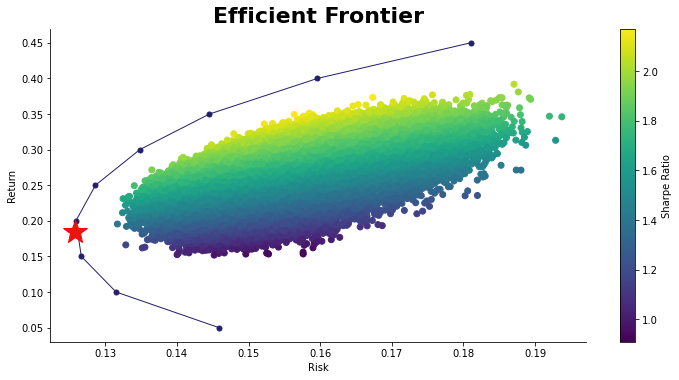

In [33]:
risk_free = 0.01
 
fig = plt.figure(figsize = (12,6))
fig.subplots_adjust(top=0.85)
ax = fig.add_subplot()
 
fig.subplots_adjust(top=0.85)
ax0 = ax.scatter(risk_list, return_list,
                c=(np.array(return_list)-risk_free)/np.array(risk_list),
                marker = 'o')
ax.plot(efficient_fronter_risk_list, efficient_fronter_return_range, linewidth=1, color='#251f6b', marker='o',
         markerfacecolor='#251f6b', markersize=5)
ax.plot(mvp_risk, mvp_return,'*',color='r', markerfacecolor='#ed1313',  markersize=25)
 
 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Efficient Frontier', fontsize=22, fontweight='bold')
ax.set_xlabel('Risk')
ax.set_ylabel('Return')
fig.colorbar(ax0, ax=ax, label = 'Sharpe Ratio')
plt.savefig('Efficient_Frontier.png',dpi=300)
print()
for i in range(len(e)):
    print(f'標準差:{format(v[i],"4f")}')
    for j in range(len(stock_symbol)):
        weighted = str(format(e[i][j],'4f'))
        print(f'{stock_symbol[j]} 權重: {weighted}')
    print('\n')    

In [12]:
print(mvp_return)

0.21323909087939039
